In [1]:
import requests as req
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic not file found - downloading it')
    url = "https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py"
    res = req.get(url)
    file = open('basic_material.py', 'w')
    file.write(res.text)
    file.close()

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2
from sympy.abc import A,B,t,f 
from sympy import re, im 

tlim = 6
tt = np.linspace(-tlim, tlim, 1000)
flim = 3
ff = np.linspace(-flim, flim, 1000)
ts = Symbol('t')

Running Python: 3.8.12
Basic file found


## Topic 7 Example 6

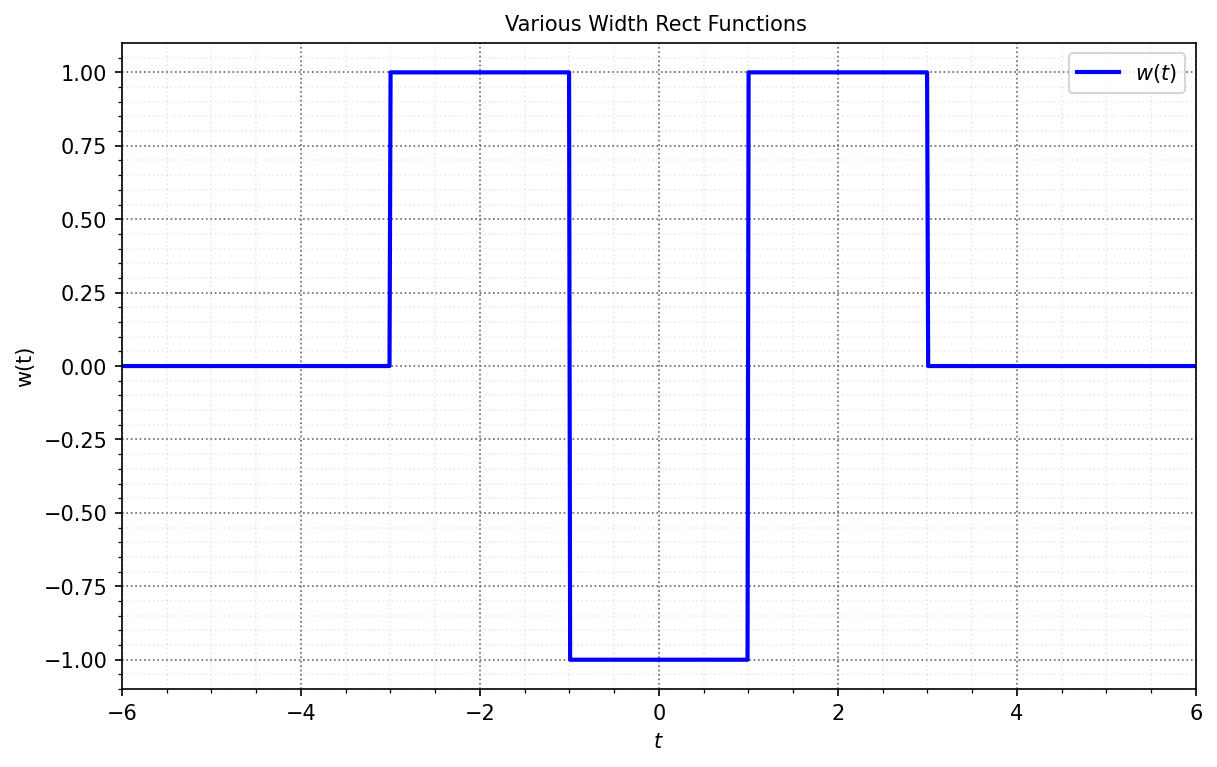

In [2]:
f1 = Piecewise((0, t <= -3),(1, t <= -1),(0, True))
f2 = Piecewise((0, t <= -1),(-1, t <= 1),(0, True))
f3 = Piecewise((0, t <= 1),(1, t <= 3),(0, True))

F1 = f1+f2+f3
lam_F1 = lambdify(ts, F1, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_F1(tt),'b',label='$w(t)$')

nicegrid()
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('w(t)')
plt.title('Various Width Rect Functions ')
plt.show()

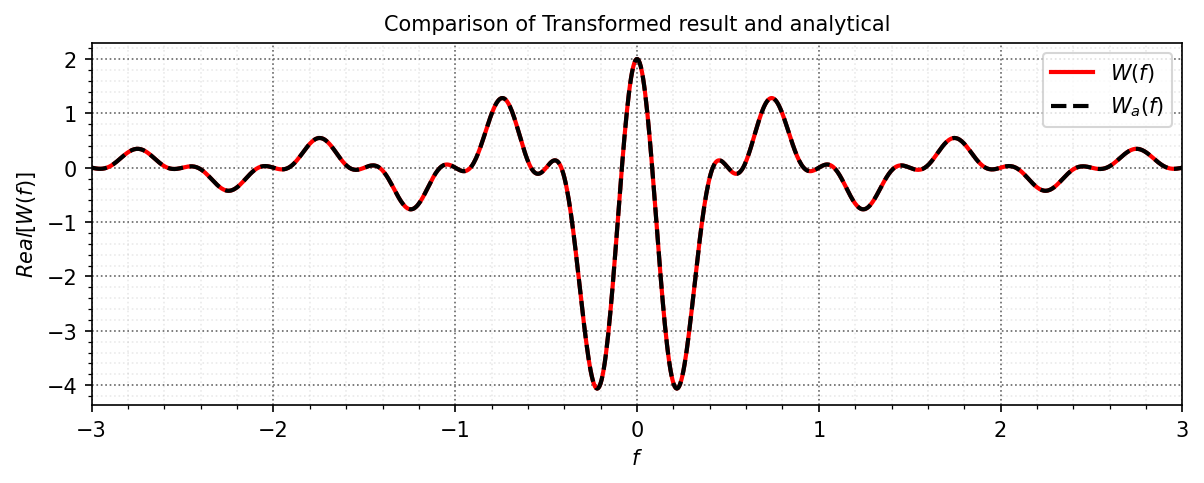

In [3]:
Q1 = fourier_transform(F1, t, f)
lam_Q1i = lambdify(f, im(Q1), modules=['numpy'])
lam_Q1r = lambdify(f, re(Q1), modules=['numpy'])

p = Symbol('p')
sincu = lambda f,p: sinc(p*np.pi*f) # swithc to sinc ftn that evetyone else uses...
# Predicted answer
QQ1 = 2*sincu(f,2)*(2*cos(4*np.pi*f)-1)
lam_QQ1r = lambdify(f, re(QQ1), modules=['numpy'])

fig, (ax1) = plt.subplots(1,1, figsize=(8,3), dpi=150)
fig.tight_layout()
ax1.plot(ff, lam_Q1r(ff),'r',label='$W(f)$')
ax1.plot(ff, lam_QQ1r(ff),'k--',label='$W_a(f)$')
ax1.set_ylabel('$Real[W(f)]$')
ax1.set_xlabel('$f$')
ax1.set_xlim(-flim,flim)
ax1.legend()
nicegrid(ax1)
plt.title('Comparison of Transformed result and analytical')
plt.show()